In [25]:
import pandas
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [40]:
data = pandas.read_csv('brain_size.csv', sep=';', na_values=".")

Usando o arquivo CSV acima que dá observações de tamanho e peso cerebral e IQ (Willerman et al., 1991), os dados são uma mistura de valores numéricos e categóricos

In [27]:
data.info(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
Unnamed: 0    40 non-null int64
Gender        40 non-null object
FSIQ          40 non-null int64
VIQ           40 non-null int64
PIQ           40 non-null int64
Weight        38 non-null float64
Height        39 non-null float64
MRI_Count     40 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 2.6+ KB


In [28]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,40.0,20.500000,11.690452,1.0,10.75,20.5,30.25,40.0
FSIQ,40.0,113.450000,24.082071,77.0,89.75,116.5,135.50,144.0
VIQ,40.0,112.350000,23.616107,71.0,90.00,113.0,129.75,150.0
PIQ,40.0,111.025000,22.471050,72.0,88.25,115.0,128.00,150.0
Weight,38.0,151.052632,23.478509,106.0,135.25,146.5,172.00,192.0
Height,39.0,68.525641,3.994649,62.0,66.00,68.0,70.50,77.0
MRI_Count,40.0,908755.000000,72282.048931,790619.0,855918.50,905399.0,950078.00,1079549.0


# Manipulando dados

In [29]:
data.shape 

(40, 8)

In [30]:
data.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [31]:
data['Gender'].head(10)

0    Female
1      Male
2      Male
3      Male
4    Female
5    Female
6    Female
7    Female
8      Male
9      Male
Name: Gender, dtype: object

In [41]:
#Simpler selector
data[data['Gender'] == 'Female']['VIQ'].mean()

109.45

In [42]:
#Simpler selector
data[data['Gender'] == 'Male']['VIQ'].mean()

115.25

### groupby: dividindo um quadro de dados em valores de variáveis categóricas:

In [33]:
groupby_gender = data.groupby('Gender')

In [34]:
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


In [35]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


# Plotando os dados

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113f660f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11427de48>]], dtype=object)

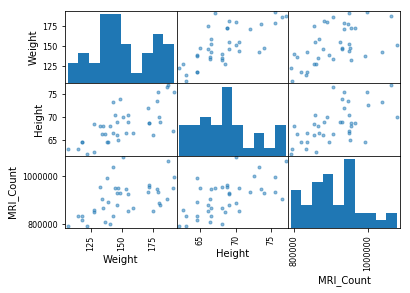

In [36]:
from pandas.tools import plotting
plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1142a1940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11477f9e8>]], dtype=object)

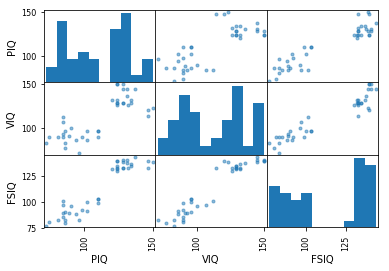

In [37]:
plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])   


# Teste de hipóteses: comparando dois grupos

In [38]:
from scipy import stats


## t-test: testando o valor de uma média de população
> Scipy.stats.ttest_1samp ()
Testes se a média da população de dados é provável que seja igual a um determinado valor (tecnicamente, se as observações são obtidas a partir de distribuições gaussianas de média de população dada). Retorna a estatística T e o valor p (veja a ajuda da função):

<img src="http://www.scipy-lectures.org/_images/two_sided.png"/>

In [39]:
stats.ttest_1samp(data['VIQ'], 0)

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

Com um valor p de 10 ^ -28, podemos afirmar que a média da população para o QI (medida VIQ) não é 0.

## t-test: teste de diferença entre as populações


Já vimos acima que o VIQ médio nas populações masculina e feminina era diferente. Para testar se isso é significativo, fazemos uma prova t de 2 amostras com scipy.stats.ttest_ind ():

In [43]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)   

Ttest_indResult(statistic=-0.77261617232750113, pvalue=0.44452876778583217)

## Testes emparelhados: medições repetidas nos mesmos indivíduos

PIQ, VIQ e FSIQ dão 3 medidas de QI. Deixe-nos testar se FISQ e PIQ são significativamente diferentes. Podemos usar um teste de 2 amostras:
<img src="http://www.scipy-lectures.org/_images/sphx_glr_plot_paired_boxplots_001.png"/>

In [44]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])  

Ttest_indResult(statistic=0.46563759638096403, pvalue=0.64277250094148408)

O problema com esta abordagem é que esquece que há links entre observações: FSIQ e PIQ são medidos nos mesmos indivíduos. Assim, a variação devido à variabilidade inter-assunto é confusa e pode ser removida, usando um "teste pareado" ou "teste de medidas repetidas":

In [45]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.082172638183642358)

Isso equivale a um teste de 1 amostra na diferença:


In [46]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0) 

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.082172638183642358)

<img src="http://www.scipy-lectures.org/_images/sphx_glr_plot_paired_boxplots_002.png"/>

> T-tests assumem erros gaussianos. Podemos usar um teste Wilcoxon de classificação assinada, que relaxa essa suposição:

> Quando se dispõe de uma amostra pequena e a variável numérica não apresenta sabidamente uma
variação normal (ou não dá para ser verificada satisfatoriamente), ou ainda, quando não há
homogeneidade das variâncias (embora exista uma correção no teste t que considera as variâncias
desiguais), o teste t não é apropriado.

> O teste de Mann-Whitney (Wilcoxon rank-sum test) é
indicado para comparação de dois grupos não pareados para se verificar se pertencem ou não à mesma
população e cujos requisitos para aplicação do teste t de Student não foram cumpridos. Na verdade,
verifica-se se há evidências para acreditar que valores de um grupo A são superiores aos valores do
grupo B. O teste U pode ser considerado a versão não paramétrica do teste t, para amostras
independentes. Ao contrário do teste t, que testa a igualdade das médias, o teste de Mann-Whitney (U)
testa a igualdade das medianas. Os valores de U calculados pelo teste avaliam o grau de entrelaçamento
dos dados dos dois grupos após a ordenação. A maior separação dos dados em conjunto indica que as
amostras são distintas, rejeitando-se a hipótese de igualdade das medianas. 


* O teste de Wilcoxon pareado é utilizado para comparar se as medidas de posição de duas amostras são iguais no caso em que as amostras são dependentes.


In [47]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])

WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

In [48]:
stats.mannwhitneyu(data['FSIQ'], data['PIQ'])

MannwhitneyuResult(statistic=695.0, pvalue=0.15715813232063375)

# Modelos lineares, múltiplos fatores e análise de variância

## "Fórmulas" para especificar modelos estatísticos em Python

### Uma regressão linear simples

> Dado dois conjuntos de observações, x e y, queremos testar a hipótese de que y é uma função linear de x. Em outros termos:

<img src="http://www.scipy-lectures.org/_images/math/bc58ea9036de1e62198871a091359876bff43a5b.png"/>

Onde 'e' é o ruído de observação. Usaremos o módulo statsmodels para:
- Ajustar um modelo linear. Usaremos a estratégia mais simples, os mínimos quadrados ordinários (OLS).
- Teste que coef não seja zero.

##### Primeiro, geramos dados simulados de acordo com o modelo:

In [49]:
import numpy as np
x = np.linspace(-5, 5, 20)
np.random.seed(1)
# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data = pandas.DataFrame({'x': x, 'y': y})

In [50]:
from statsmodels.formula.api import ols

In [52]:
model = ols("y ~ x", data).fit()

In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Thu, 22 Jun 2017   Prob (F-statistic):           8.56e-08
Time:                        13:03:45   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.000        -7.710    -3.357
x              2.9369      0.341      8.604      0.000         2.220     3.654
==============================================================================
Omnibus:                        0.100   Durbin-Watson:                   2.956
Prob(Omnibus):                  0.951   Jarque-Bera (JB):                0.322
Skew:                          -0.058   Prob(JB):                        0.851
Kurtosis:                       2.390   Cond. No.                         3.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Statsmodels usa uma terminologia estatística: a variável y em statsmodels é chamada de "endógena", enquanto a variável x é chamada de exógeno.

Para simplificar, y (endógeno) é o valor que você está tentando prever, enquanto que x (exógeno) representa os recursos que você está usando para fazer a predição.

###  Categorical variables: comparing groups or multiple categories


- Podemos escrever uma comparação entre QI masculino e feminino usando um modelo linear:

In [57]:
data = pandas.read_csv('brain_size.csv', sep=';', na_values=".")
model = ols("VIQ ~ Gender + 1", data).fit()

In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Thu, 22 Jun 2017   Prob (F-statistic):              0.445
Time:                        13:06:35   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.619      0.000        98.704   120.196
Gender[T.Male]     5.8000      7.507      0.773      0.445        -9.397    20.997
==============================================================================
Omnibus:                       26.188   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.703
Skew:                           0.010   Prob(JB):                        0.157
Kurtosis:                       1.510   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Link para testes t entre diferentes FSIQ e PIQ

* Para comparar diferentes tipos de QI, precisamos criar uma tabela "de forma longa", listando QI, onde o tipo de QI é indicado por uma variável categórica:

In [64]:
data_fisq = pandas.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})
data_piq = pandas.DataFrame({'iq': data['PIQ'], 'type': 'piq'})
data_long = pandas.concat((data_fisq, data_piq))
data_long.head(5)

,iq,type
0,133,fsiq
1,140,fsiq
2,139,fsiq
3,133,fsiq
4,137,fsiq


In [65]:
model = ols("iq ~ type", data_long).fit()

In [66]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Thu, 22 Jun 2017   Prob (F-statistic):              0.643
Time:                        13:09:29   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept     113.4500      3.683     30.807      0.000       106.119   120.781
type[T.piq]    -2.4250      5.208     -0.466      0.643       -12.793     7.943
==============================================================================
Omnibus:                      164.598   Durbin-Watson:                   1.531
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.062
Skew:                          -0.110   Prob(JB):                       0.0178
Kurtosis:                       1.461   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Podemos ver que recuperamos os mesmos valores para o teste t e os valores p correspondentes para o efeito do tipo de iq do que a prova t anterior:

In [67]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])

Ttest_indResult(statistic=0.46563759638096403, pvalue=0.64277250094148408)

### Regressão múltipla: incluindo múltiplos fatores

Considere um modelo linear explicando uma variável z (a variável dependente) com 2 variáveis x e y:

Esse modelo pode ser visto em 3D como um plano para uma nuvem de pontos (x, y, z)

<img src="http://www.scipy-lectures.org/_images/sphx_glr_plot_regression_3d_001.png"/>

In [68]:
data = pandas.read_csv('iris.csv')
model = ols('sepal_width ~ name + petal_length', data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Thu, 22 Jun 2017   Prob (F-statistic):           1.58e-20
Time:                        13:13:18   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              2.9813      0.099     29.989      0.000         2.785     3.178
name[T.versicolor]    -1.4821      0.181     -8.190      0.000        -1.840    -1.124
name[T.virginica]     -1.6635      0.256     -6.502      0.000        -2.169    -1.158
petal_length           0.2983      0.061      4.920      0.000         0.178     0.418
==============================================================================
Omnibus:                        2.868   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                2.885
Skew:                          -0.082   Prob(JB):                        0.236
Kurtosis:                       3.659   Cond. No.                         54.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Teste de hipóteses pós-hoc: análise de variância (ANOVA)

No exemplo da íris acima, desejamos testar se o comprimento da pétala é diferente entre versicolor e virginica, depois de remover o efeito da largura sepal. Isso pode ser formulado como testando a diferença entre o coeficiente associado a versicolor e virginica no modelo linear estimado acima (é uma Análise de Variância, ANOVA). Para isso, escrevemos um vetor de "contraste" nos parâmetros estimados: queremos testar "nome [T.versicolor] - nome [T.virginica]", com um teste F:

In [69]:
model.f_test([0, 1, -1, 0])

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[ 3.24533535]]), p=0.07369058781701113, df_denom=146, df_num=1>

### Mais visualização: seaborn para exploração estatística

* EDUCATION: Number of years of education.
* SOUTH: Indicator variable for Southern Region (1=Person lives in 		South, 0=Person lives elsewhere).
* SEX: Indicator variable for sex (1=Female, 0=Male).
* EXPERIENCE: Number of years of work experience.
* UNION: Indicator variable for union membership (1=Union member, 		0=Not union member).
* WAGE: Wage (dollars per hour).
* AGE: Age (years).
* RACE: Race (1=Other, 2=Hispanic, 3=White).
* OCCUPATION: Occupational category (1=Management, 		2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other).
* SECTOR: Sector (0=Other, 1=Manufacturing, 2=Construction).
* MARR: Marital Status (0=Unmarried,  1=Married)

In [74]:
wage = pandas.read_csv("wage.csv",sep=";")

In [75]:
wage.head(2)

,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,0,1,21,0,5.10,35,2,6,1,1
1,9,0,1,42,0,4.95,57,3,6,1,1


In [76]:
import seaborn

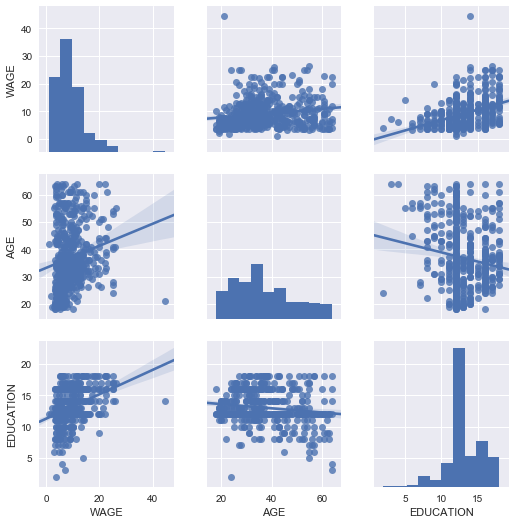

In [78]:
seaborn.pairplot(wage, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg')

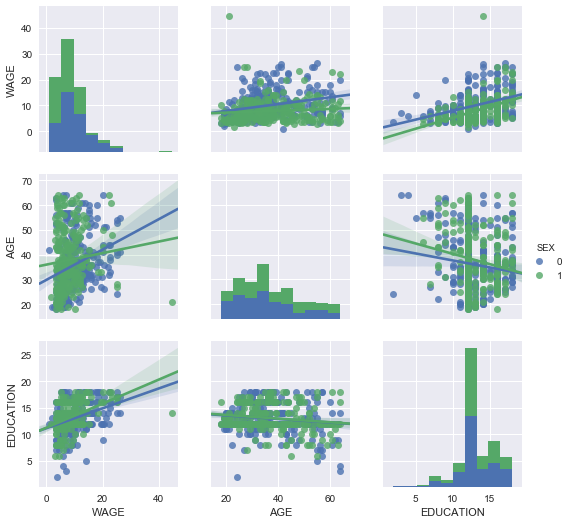

In [79]:
seaborn.pairplot(wage, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg', hue='SEX')

### Lmplot: planejando uma regressão univariada

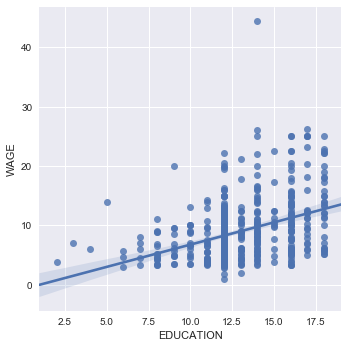

In [80]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=wage)  

- Regressão robusta

Dado que, no gráfico acima, parece haver alguns pontos de dados que estão fora da nuvem principal à direita, eles podem ser outliers, não representativos da população, mas dirigindo a regressão.
Para calcular uma regressão que é menos sensível a outliers, é preciso usar um modelo robusto. Isso é feito em seaborn usando robust = True nas funções de plotagem, ou em statsmodels, substituindo o uso do OLS por um "Modelo linear robusto", statsmodels.formula.api.rlm ().

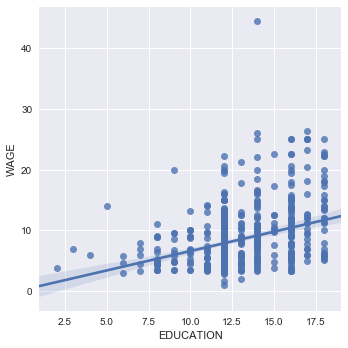

In [81]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=wage,robust = True)  

In [82]:
from statsmodels.formula.api import rlm

In [84]:
model = rlm("WAGE ~ EDUCATION", wage).fit()

In [85]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                   WAGE   No. Observations:                  534
Model:                            RLM   Df Residuals:                      532
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 22 Jun 2017                                         
Time:                        13:31:07                                         
No. Iterations:                    18                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2165      0.890      0.243      0.808        -1.527     1.960
EDUCATION      0.6377      0.067      9.518      0.000         0.506     0.769
==============================================================================

If the model instance has been used for another fit with different fit
parameters, then the fit options might not be the correct ones anymore .
"""

### Teste de interações

<img src="http://www.scipy-lectures.org/_images/sphx_glr_plot_wage_education_gender_001.png"/>

* Os salários aumentam mais com a educação para homens do que para mulheres?
  O gráfico acima é feito de dois ajustes diferentes. 
  
  Precisamos formular um modelo único que teste uma variância de declive em toda a população. Isso é feito através de uma "interação".

In [99]:
wage.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 11 columns):
EDUCATION     534 non-null int64
SOUTH         534 non-null int64
SEX           534 non-null int64
EXPERIENCE    534 non-null int64
UNION         534 non-null int64
WAGE          534 non-null float64
AGE           534 non-null int64
RACE          534 non-null int64
OCCUPATION    534 non-null int64
SECTOR        534 non-null int64
MARR          534 non-null int64
dtypes: float64(1), int64(10)
memory usage: 46.0 KB


In [107]:
#result = ols(formula='wage ~ EDUCATION + gender + EDUCATION * gender', data=wage).fit()    
#result.summary()  

Podemos concluir que a educação beneficia mais os homens do que as mulheres?



- Testes de hipóteses e p-valor lhe dão o significado de um efeito / diferença
- As fórmulas (com variáveis categóricas) permitem expressar links ricos em seus dados
- A visualização de seus dados e o modelo simples se encaixam nas questões!
- Acondicionamento (fatores de adição que podem explicar a totalidade ou parte da variação) é um aspecto de modelagem importante que altera a interpretação.

### Correlação e análise da curva

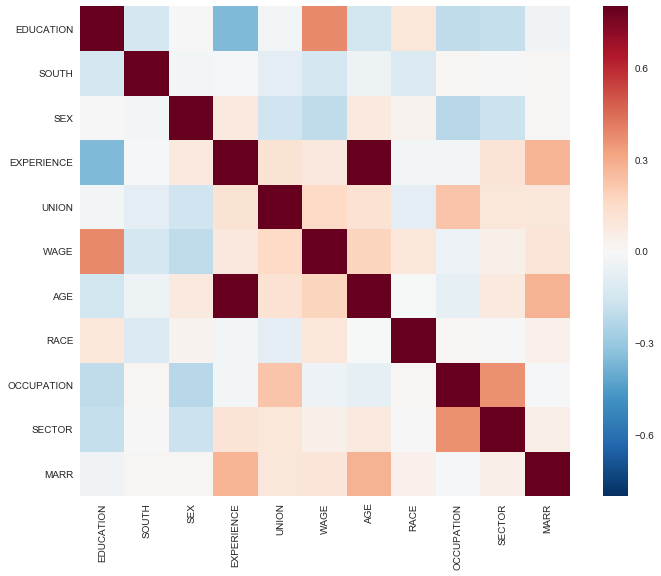

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = wage.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [131]:
print("Skewness: %f" % wage['WAGE'].skew())
print("Kurtosis: %f" % wage['WAGE'].kurt())

Skewness: 1.697286
Kurtosis: 4.991768


### scatter plot AGE/WAGE

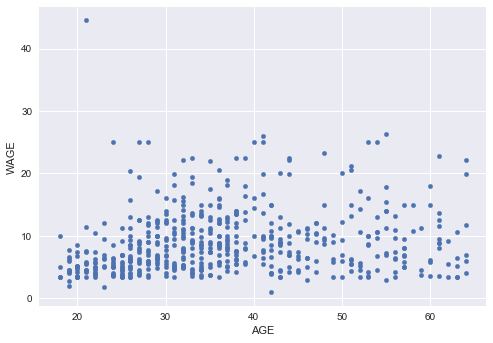

In [133]:
var = 'AGE'
data = pandas.concat([wage['WAGE'], wage[var]], axis=1)
data.plot.scatter(x=var, y='WAGE');

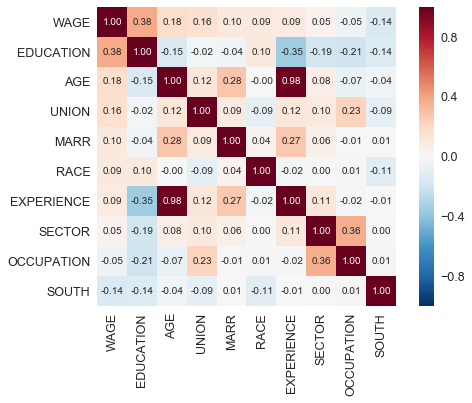

In [112]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'WAGE')['WAGE'].index
cm = np.corrcoef(wage[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


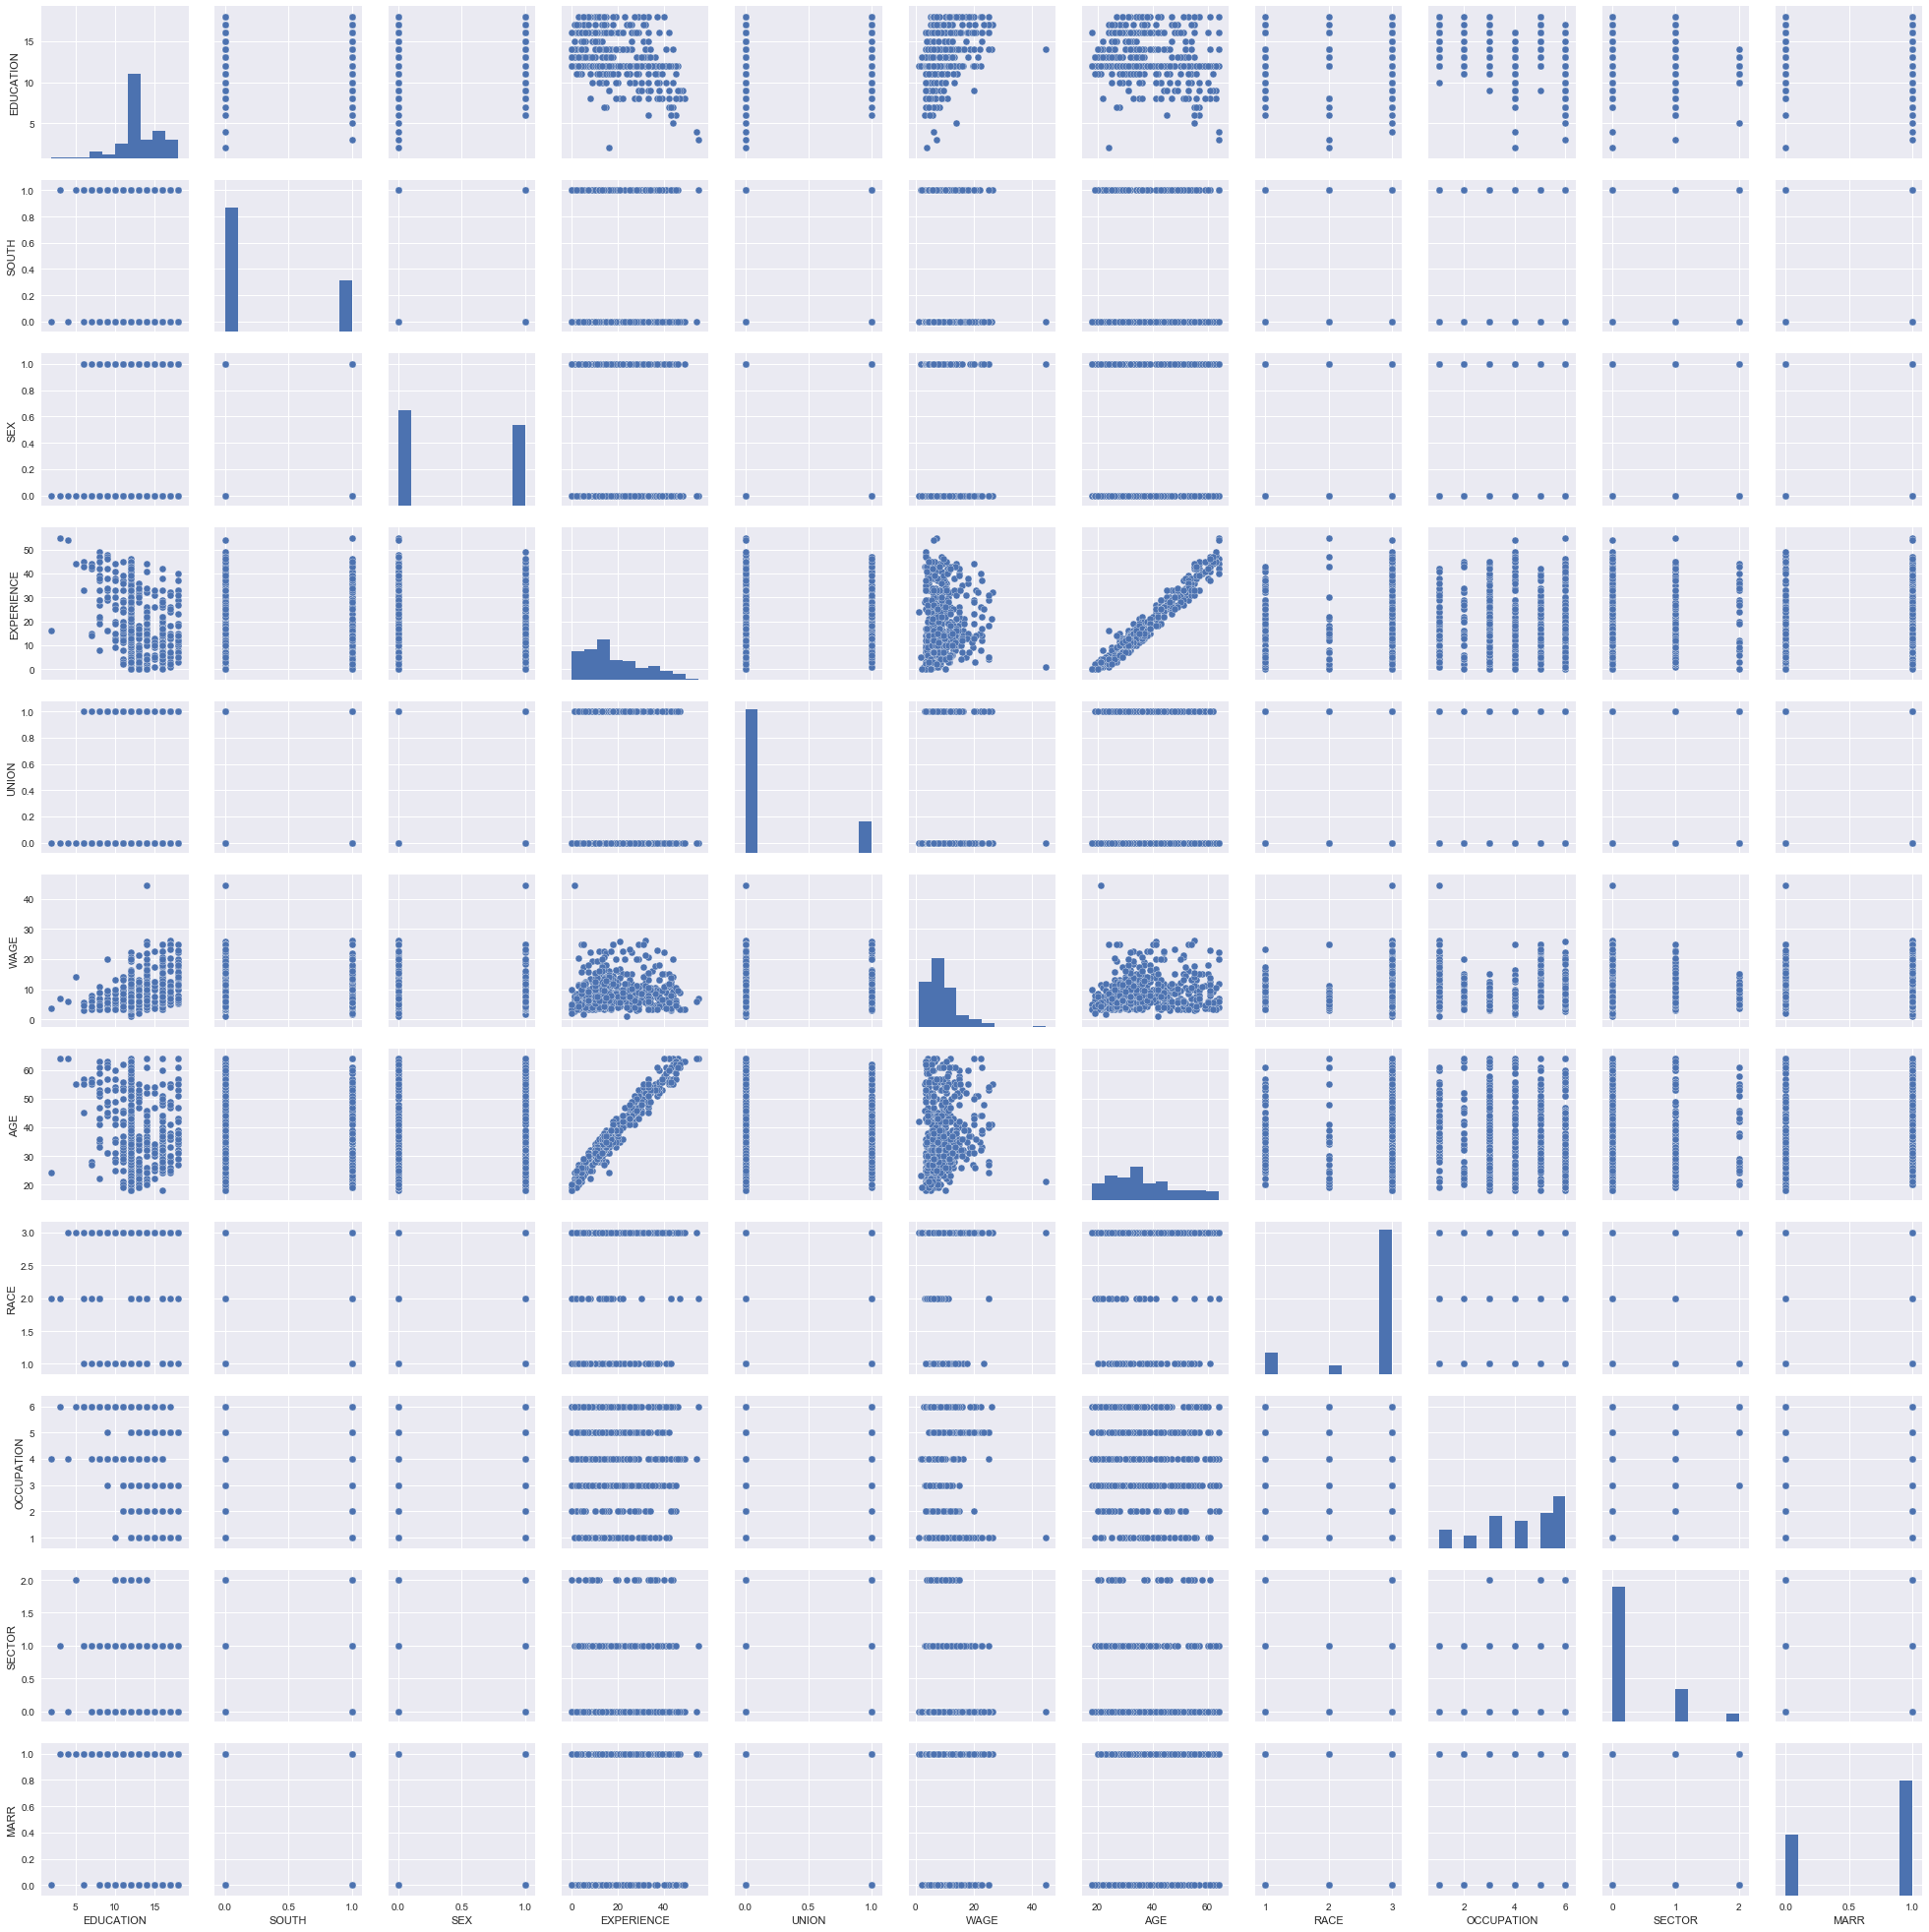

In [113]:
sns.set()
sns.pairplot(wage[wage.columns], size = 2.5)
plt.show();

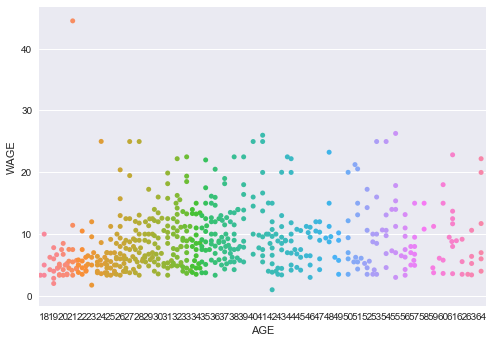

In [121]:
sns.swarmplot(x="AGE", y="WAGE", data=wage);

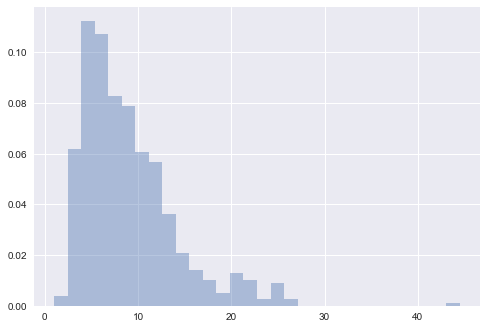

In [125]:
from scipy.stats import norm
from contextlib import suppress
with suppress(Exception):
    sns.distplot(wage["WAGE"], fit=norm);
    fig = plt.figure()

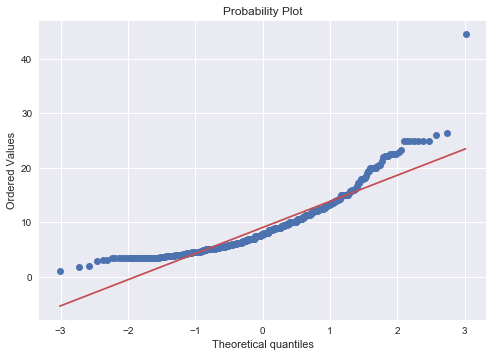

In [127]:
with suppress(Exception):
    res = stats.probplot(wage['WAGE'], plot=plt)

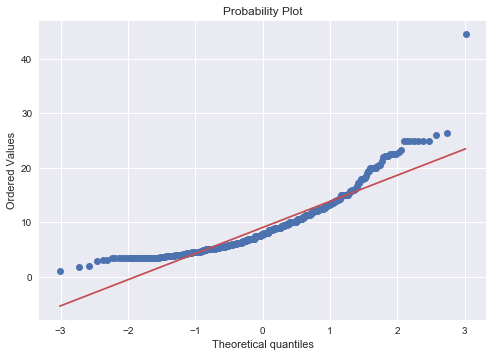

In [130]:
res = stats.probplot(wage['WAGE'], plot=plt)